In [6]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np
import pandas as pd
import csv

In [7]:
datos = pd.read_csv("D:/UNAD/Practica Analisis de Datos/framingham.csv", sep=",")
datos.head(20)

In [8]:
datos

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


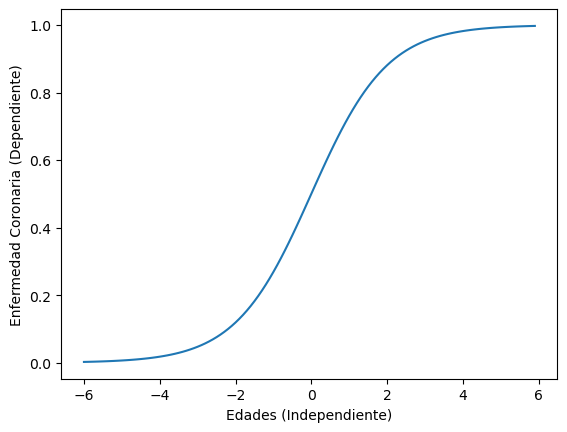

In [32]:
#Funcion Logistica
x = np.arange(-6.0, 6.0, 0.1)
y = 1.0  / (1.0 + np.exp(-x))
plt.plot(x,y)
plt.ylabel('Enfermedad Coronaria (Dependiente)')
plt.xlabel('Edades (Independiente)')
plt.show()

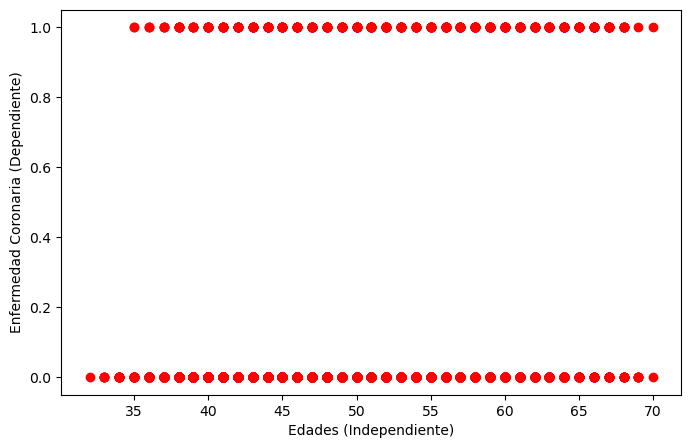

In [33]:
#Graficamos los datos para observar el comportamiento y elegir el tipo de modelo
plt.figure(figsize=(8,5))
x_datos, y_datos = (datos["age"].values, datos["TenYearCHD"].values)#tomamos los datos
plt.plot(x_datos, y_datos, 'ro')#los graficamos
plt.ylabel('Enfermedad Coronaria (Dependiente)')
plt.xlabel('Edades (Independiente)')
plt.show()

In [34]:
#definimos la funcion sigmoide
def sigmoide (x,beta1,beta2):
        y = 1 / (1 + np.exp(-beta1*(x-beta2)))
        return y            

In [35]:
#Graficamos la linea sigmoide
beta1 = 45
beta2= 2

In [36]:
#hacemos una prediccion inicial
y_pred = sigmoide(x_datos,beta1,beta2)

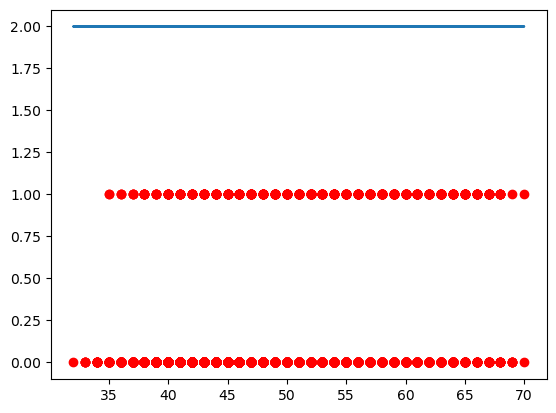

In [40]:
#Grafica de la preddcion inicial
plt.plot(x_datos, y_pred*2.)
plt.plot(x_datos, y_datos, 'ro')
plt.show()

In [41]:
#Normalizamos los datos
xdatos = x_datos/max(x_datos)
ydatos = y_datos/max(y_datos)

In [44]:
#Usamos Curve Fit para ajustar la funcion sigmoide
from scipy.optimize import curve_fit #se importa la libreria
betas, pcov = curve_fit(sigmoide, xdatos, ydatos) #modificamos betas
print (" beta_1 = %f, beta_2 = %f" % (betas[0], betas[1]))


 beta_1 = 4.916930, beta_2 = 1.081346


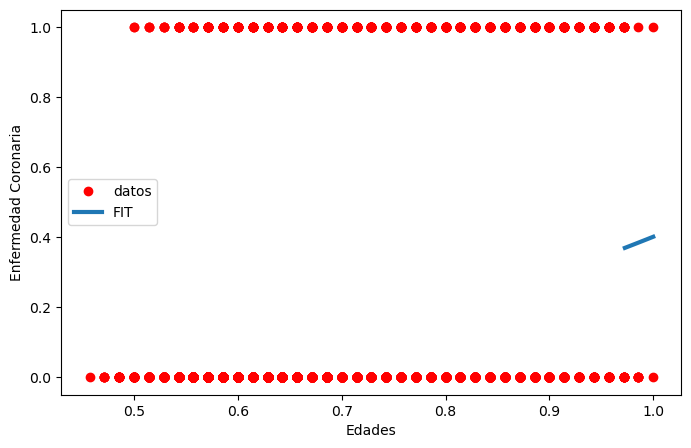

In [45]:
#Graficamos el modelo sigmoide con los nuevos parametros
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoide(x, *betas)
plt.plot(xdatos, ydatos, 'ro', label='datos')
plt.plot(x,y, linewidth=3.0, label='FIT')
plt.legend(loc='best')
plt.ylabel('Enfermedad Coronaria')
plt.xlabel('Edades')
plt.show()